In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the cleaned dataset
df = pd.read_csv('cleaned_test.csv')
df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian,object
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,object
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,object
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,object
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,object


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          10908 non-null  float64
 3   Delivery_person_Ratings      10892 non-null  float64
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  10955 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weather                      11241 non-null  object 
 12  Road_traffic_density         11245 non-null  object 
 13  Vehicle_conditio

In [4]:
df.isnull().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weather                        158
Road_traffic_density           154
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                           324
Name:                            0
dtype: int64

In [5]:
#getting columns(float type) with null
df_nulls_num = df.select_dtypes(include='float64').isnull().sum()
df_nulls_num = df_nulls_num[df_nulls_num != 0]
df_nulls_num

Delivery_person_Age        491
Delivery_person_Ratings    507
multiple_deliveries        238
dtype: int64

In [6]:
for i in df_nulls_num.index:
    mean_rounded = round(df[i].mean())
    df[i] = df[i].fillna(mean_rounded)



In [7]:
# Converting to datetime (ignoring NaN for now)
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M', errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M', errors='coerce')
# Filling with a fixed time like median time
median_time = df['Time_Orderd'].median()
df['Time_Orderd'].fillna(median_time, inplace=True)
df['Time_Order_picked'].fillna(median_time, inplace=True)


/var/folders/5h/4ph8qb8d4bdb_swlnqfcn0pm0000gn/T/ipykernel_24730/628470861.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_Orderd'].fillna(median_time, inplace=True)
/var/folders/5h/4ph8qb8d4bdb_swlnqfcn0pm0000gn/T/ipykernel_24730/628470861.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [8]:
#getting columns(float type) with null
df_nulls_obj = df.select_dtypes(include='object').isnull().sum()
df_nulls_obj = df_nulls_obj[df_nulls_obj != 0]
df_nulls_obj

Weather                 158
Road_traffic_density    154
Festival                 65
City                    324
dtype: int64

In [9]:
#filling object type columns with null
for i in df_nulls_obj.index:
    df[i] = df[i].fillna(df[i].mode()[0])

In [10]:
# encoding ordinal columns
def labels(df, data):
    unique_vals = df[data].unique()
    label_dict = {val: idx for idx, val in enumerate(unique_vals, 0)}
    df[data + '_encoded'] = df[data].map(label_dict)
    #dropping the columns that were encoded
    # df.drop(columns=[data])
    return label_dict

In [11]:
print(labels(df, 'Weather'))
print(labels(df, "Road_traffic_density"))
print(labels(df, "Type_of_order"))
print(labels(df, "Type_of_vehicle"))
print(labels(df, "Festival"))
print(labels(df, "City"))

{'Sunny': 0, 'Windy': 1, 'Stormy': 2, 'Fog': 3, 'Cloudy': 4, 'Sandstorms': 5}
{'Low': 0, 'Jam': 1, 'Medium': 2, 'High': 3}
{'Drinks': 0, 'Snack': 1, 'Meal': 2, 'Buffet': 3}
{'electric_scooter': 0, 'motorcycle': 1, 'scooter': 2, 'bicycle': 3}
{'No': 0, 'Yes': 1}
{'Metropolitian': 0, 'Urban': 1, 'Semi-Urban': 2}


In [12]:
#df after encoding
df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,multiple_deliveries,Festival,City,Name:,Weather_encoded,Road_traffic_density_encoded,Type_of_order_encoded,Type_of_vehicle_encoded,Festival_encoded,City_encoded
0,0x2318,COIMBRES13DEL01,30.0,5.0,11.003669,76.976494,11.043669,77.016494,30-03-2022,1900-01-01 19:20:00,...,1.0,No,Metropolitian,object,0,0,0,0,0,0
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,1900-01-01 20:30:00,...,1.0,No,Metropolitian,object,1,1,1,1,0,0
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,1900-01-01 19:35:00,...,1.0,No,Metropolitian,object,2,1,0,1,0,0
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,1900-01-01 17:15:00,...,1.0,No,Metropolitian,object,3,2,2,2,0,0
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,1900-01-01 18:25:00,...,1.0,No,Metropolitian,object,0,2,0,2,0,0


In [13]:
# maximum and minimum age of delivery person
print(max(df['Delivery_person_Age']))
print(min(df['Delivery_person_Age']))

50.0
15.0


In [14]:
#feature binning delivery person's age

label = ['15-25', '26-35', '36-45', '46-50', '51+']
bins = [15, 25, 35, 45, 50, 51]
df["Delivery_person_Age_Bins"] = pd.cut(df['Delivery_person_Age'] , labels = label, bins=bins, include_lowest = True)
#dropping age column
df.drop(columns = ['Delivery_person_Age']).head(5)

,ID,Delivery_person_ID,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Festival,City,Name:,Weather_encoded,Road_traffic_density_encoded,Type_of_order_encoded,Type_of_vehicle_encoded,Festival_encoded,City_encoded,Delivery_person_Age_Bins
0,0x2318,COIMBRES13DEL01,5.0,11.003669,76.976494,11.043669,77.016494,30-03-2022,1900-01-01 19:20:00,1900-01-01 15:05:00,...,No,Metropolitian,object,0,0,0,0,0,0,26-35
1,0x3474,BANGRES15DEL01,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,1900-01-01 20:30:00,1900-01-01 20:35:00,...,No,Metropolitian,object,1,1,1,1,0,0,26-35
2,0x9420,JAPRES09DEL03,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,1900-01-01 19:35:00,1900-01-01 19:45:00,...,No,Metropolitian,object,2,1,0,1,0,0,15-25
3,0x72ee,JAPRES07DEL03,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,1900-01-01 17:15:00,1900-01-01 17:20:00,...,No,Metropolitian,object,3,2,2,2,0,0,15-25
4,0xa759,CHENRES19DEL01,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,1900-01-01 18:25:00,1900-01-01 18:40:00,...,No,Metropolitian,object,0,2,0,2,0,0,26-35


INSIGHT EXTRACTIONS:

Insight extraction 1. Delivery Time Analysis - checking for factors that impact delivery time

In [15]:
#finding the difference between time ordered and time order picked
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M', errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M', errors='coerce')

#adjusting for midnight crossover
df['Time_Order_picked_adj'] = df['Time_Order_picked']
df.loc[df['Time_Order_picked'] < df['Time_Orderd'], 'Time_Order_picked_adj'] += pd.Timedelta(days=1)

df['Order_Pickup_Duration'] = df['Time_Order_picked_adj'] - df['Time_Orderd']
df['Delivery_time_hr'] = df['Order_Pickup_Duration'].dt.total_seconds() / 3600

#filtering unrealistic deuation
df = df[(df['Delivery_time_hr'] > 0) & (df['Delivery_time_hr'] < 8)]


In [16]:
#using haversine formula to find distance between two points on a sphere

def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers (can change to 3959 for miles)
    km = 6371 * c
    return km


In [17]:
df['distance_km'] = haversine(
    df['Restaurant_latitude'],
    df['Restaurant_longitude'],
    df['Delivery_location_latitude'],
    df['Delivery_location_longitude']
)
df['distance_km']

1        17.076617
2        13.406029
3        13.413644
4        17.076259
5         1.543933
           ...    
11394    16.384901
11395     1.489842
11396     9.121874
11397    19.687777
11398     7.760928
Name: distance_km, Length: 9820, dtype: float64

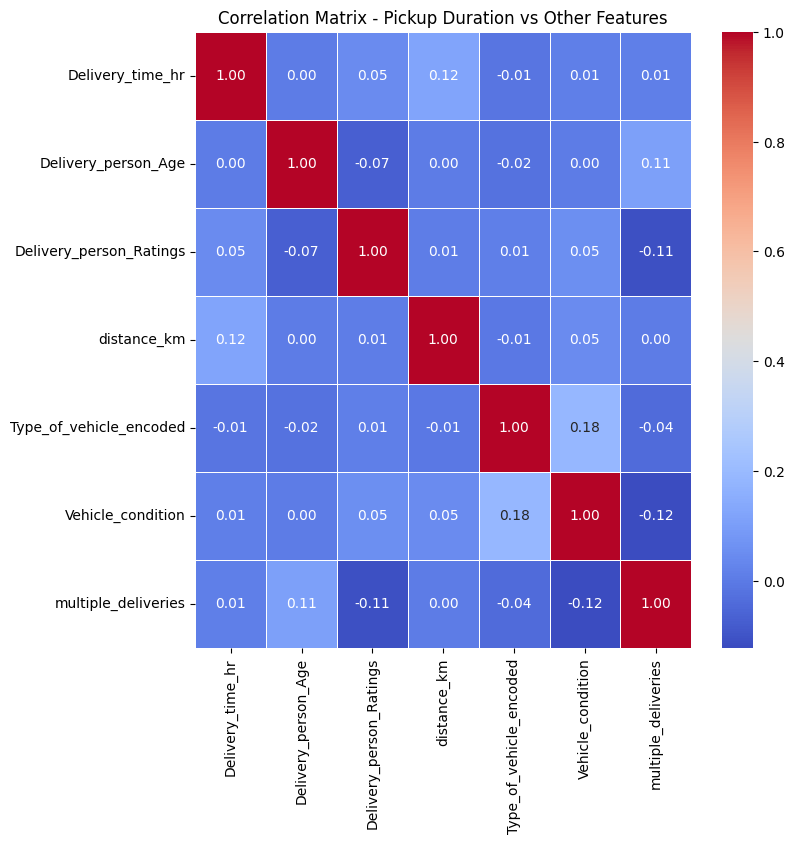

In [18]:
numeric_df = df[['Delivery_time_hr', 'Delivery_person_Age', 'Delivery_person_Ratings', 'distance_km', 'Type_of_vehicle_encoded', 'Vehicle_condition', 'multiple_deliveries']]

# Step 2: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix - Pickup Duration vs Other Features')
plt.show()

I extracted the following insights on delivery time analysis:

-Multiple deliveries and distance slightly increase delivery duration.

-Age, ratings, and vehicle condition of the delivery person do not significantly affect the delivery time.

Text(0.5, 1.0, 'Order Count')

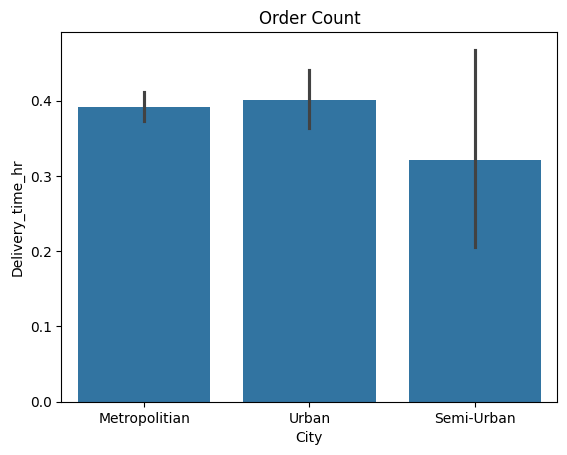

In [19]:
sns.barplot(x='City', y='Delivery_time_hr', data=df)
plt.title('Order Count')

From the above graph it is seen that delivery time is less in semi-urban area. Now lets see what factors influence them.

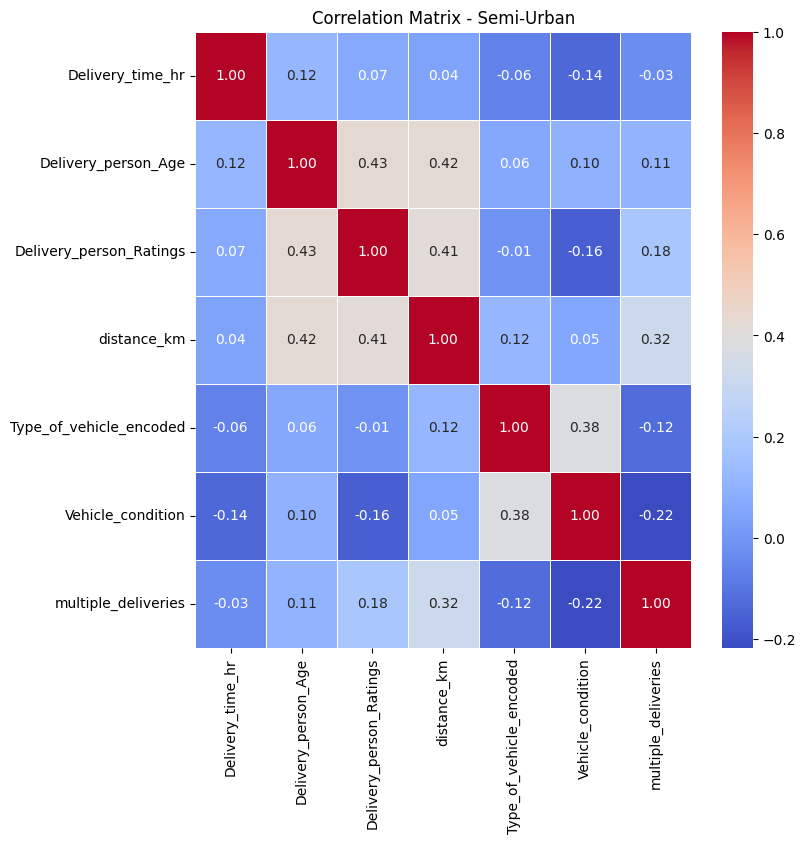

In [20]:
# filtering put for only semi-urban areas
semi_urban_df = df[df['City'] == 'Semi-Urban']

semi_urban_numeric = semi_urban_df[['Delivery_time_hr', 'Delivery_person_Age', 'Delivery_person_Ratings', 'distance_km', 'Type_of_vehicle_encoded', 'Vehicle_condition', 'multiple_deliveries']]

semi_urban_corr = semi_urban_numeric.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(semi_urban_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix - Semi-Urban')
plt.show()

Extracted insights from delivery time in hours in Semi-urban areas:

-In semi-urban areas, longer distances do not significantly increase delivery time. Might be due to less traffic congestion or better road conditions.

-Older delivery personnel may take slightly longer to deliver. Consider training or assigning shorter routes to older personnel if optimization is needed.

-Delivery personnel seem to have better vehicle condition and better vehicle typeswhich results in faster delivery time.

-Multiple deliveries aren't significantly improving delivery time.

Insight Extraction 2. Delivery Personnel Performance - Analyzing what factors influence better ratings in delivery personnels

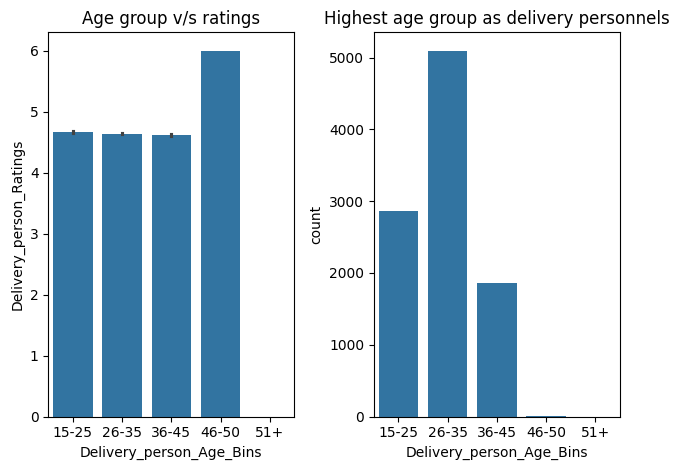

In [21]:
#finding which age group has more ratings 

plt.subplot(1, 2, 1)
plt.title('Age group v/s ratings')
sns.barplot(x='Delivery_person_Age_Bins', y='Delivery_person_Ratings', data = df)


plt.subplot(1, 2, 2)
plt.title('Highest age group as delivery personnels')
sns.countplot(x='Delivery_person_Age_Bins', data = df)

plt.tight_layout()
plt.show()

It is seen from the above two graphs that there are more delivery personnels between age group of 26-35 but have comparitively less ratings on an average compared to age group of 46-50. But the large number in group 26-35 could dilute the average rating due to more variability or inclusion of less-experienced staff.

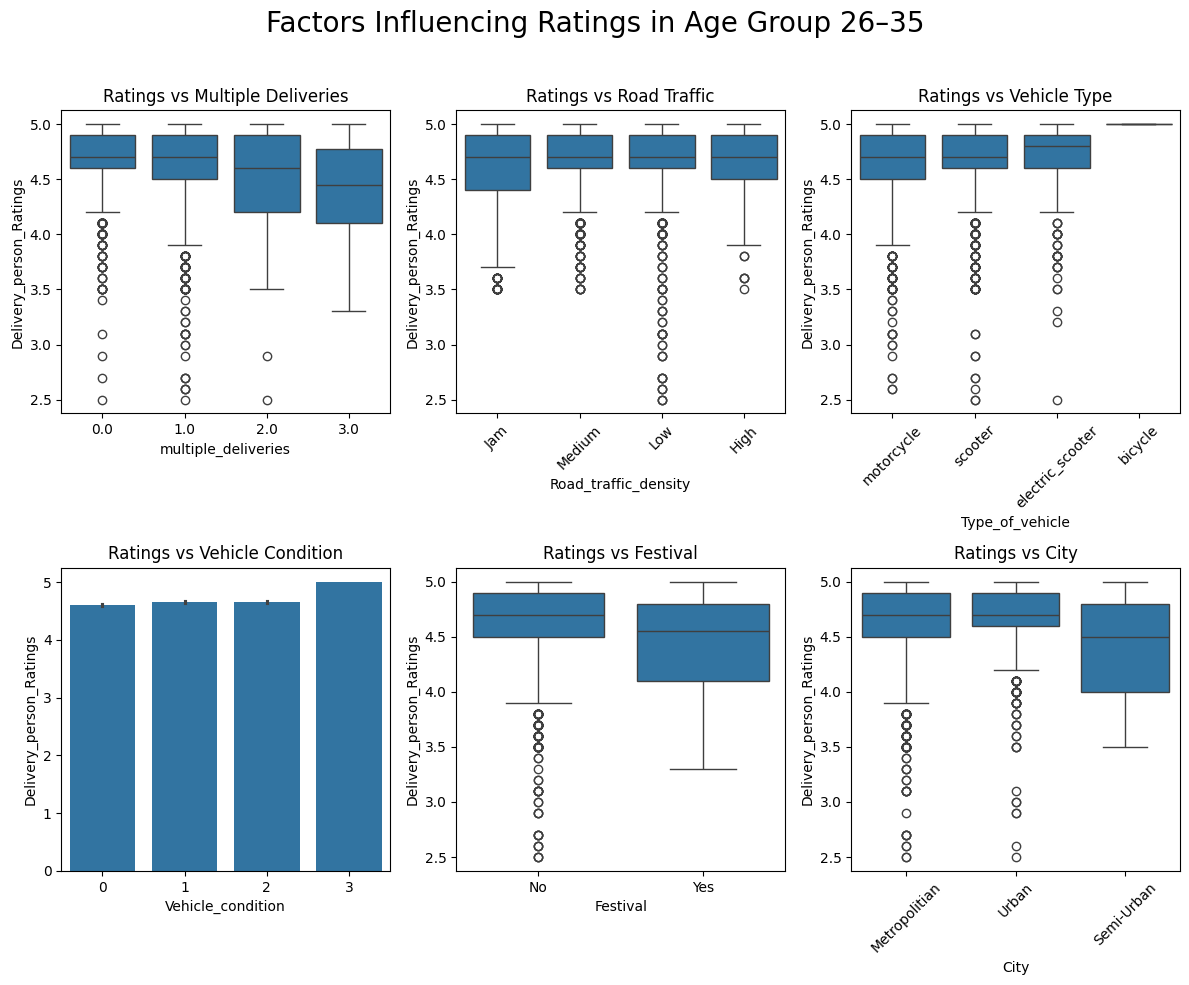

In [22]:
#plotting the factors that influence the ratings of age group 26-35
age_2635_df = df[df['Delivery_person_Age_Bins'] == '26-35']

# Create a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
# plt.subplots_adjust(hspace=0.4, wspace=0.3)
# sns.set_style("whitegrid")

#multiple Deliveries vs Ratings
sns.boxplot(data=age_2635_df, x='multiple_deliveries', y='Delivery_person_Ratings', ax=axes[0,0])
axes[0,0].set_title('Ratings vs Multiple Deliveries')

#road Traffic vs Ratings
sns.boxplot(data=age_2635_df, x='Road_traffic_density', y='Delivery_person_Ratings', ax=axes[0,1])
axes[0,1].set_title('Ratings vs Road Traffic')
axes[0,1].tick_params(axis='x', rotation=45)

#vehicle Type vs Ratings
sns.boxplot(data=age_2635_df, x='Type_of_vehicle', y='Delivery_person_Ratings', ax=axes[0,2])
axes[0,2].set_title('Ratings vs Vehicle Type')
axes[0,2].tick_params(axis='x', rotation=45)

#vehicle Condition vs Ratings
sns.barplot(data=age_2635_df, x='Vehicle_condition', y='Delivery_person_Ratings', ax=axes[1,0])
axes[1,0].set_title('Ratings vs Vehicle Condition')

#festival vs Ratings
sns.boxplot(data=age_2635_df, x='Festival', y='Delivery_person_Ratings', ax=axes[1,1])
axes[1,1].set_title('Ratings vs Festival')

# city vs Ratings (optional)
sns.boxplot(data=age_2635_df, x='City', y='Delivery_person_Ratings', ax=axes[1,2])
axes[1,2].set_title('Ratings vs City')
axes[1,2].tick_params(axis='x', rotation=45)

plt.suptitle('Factors Influencing Ratings in Age Group 26–35', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Extracted insights from Delivery Personnel performance:

1. Multiple Deliveries vs Ratings
Ratings are slightly higher for those making 0–1 multiple deliveries.
A drop is observed when the number of deliveries increases to 2 or 3, possibly due to fatigue or rushed service.

2. Road Traffic vs Ratings
Low and Medium traffic conditions correlate with higher ratings.
Jam and High traffic slightly reduce ratings—delays and stress may negatively impact service quality.

3. Vehicle Type vs Ratings
Bicycles and Motorcycles receive the highest ratings.
Scooters show slightly lower ratings, possibly due to speed or comfort constraints.
Electric scooters also perform well, supporting eco-friendly options.

4. Vehicle Condition vs Ratings
A clear positive trend: better vehicle condition leads to higher ratings.
This may reflect smoother delivery experience and professional image.

5. Festival vs Ratings
Ratings drop during festivals, likely due to:
Heavy traffic
High delivery volume
Customer impatience or festive chaos

6. City vs Ratings
Metropolitan and Urban areas show better average ratings than Semi-Urban.
Semi-urban deliveries may face challenges like poor infrastructure or longer distances.

In [28]:
#creating a new column for calculating the average delivery speed of delivery personnels
df['Delivery_speed'] = df['distance_km']/df['Delivery_time_hr']

In [29]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_order_encoded,Type_of_vehicle_encoded,Festival_encoded,City_encoded,Delivery_person_Age_Bins,Time_Order_picked_adj,Order_Pickup_Duration,Delivery_time_hr,distance_km,Delivery_speed
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,1900-01-01 20:30:00,...,1,1,0,0,26-35,1900-01-01 20:35:00,0 days 00:05:00,0.083333,17.076617,204.919409
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,1900-01-01 19:35:00,...,0,1,0,0,15-25,1900-01-01 19:45:00,0 days 00:10:00,0.166667,13.406029,80.436177
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,1900-01-01 17:15:00,...,2,2,0,0,15-25,1900-01-01 17:20:00,0 days 00:05:00,0.083333,13.413644,160.963729
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,1900-01-01 18:25:00,...,0,2,0,0,26-35,1900-01-01 18:40:00,0 days 00:15:00,0.250000,17.076259,68.305036
5,0xc4af,GOARES04DEL01,26.0,4.7,15.569600,73.742294,15.579600,73.752294,15-02-2022,1900-01-01 09:45:00,...,0,1,0,0,26-35,1900-01-01 09:55:00,0 days 00:10:00,0.166667,1.543933,9.263600


In [30]:
df.to_excel('amazon_delivery_analysis.xlsx')